In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import pandas as pd
import geopandas as gpd
import geoplot as gplt

Alternative approach:
https://github.com/mthh/cartogram_geopandas

In [3]:
# load the example data
nyc_boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
nyc_boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ..."
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ..."
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ..."
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ..."
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ..."


In [13]:
nyc_boroughs['productions'] = [10,25,35,15,15]
nyc_boroughs['attractions'] = [5,5,10,70,10]
nyc_boroughs

,BoroCode,BoroName,Shape_Leng,Shape_Area,geometry,productions,attractions
0,5,Staten Island,330385.03697,1.623853e+09,"MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...",10,5
1,4,Queens,861038.47930,3.049947e+09,"MULTIPOLYGON (((-73.83668 40.59495, -73.83678 ...",25,5
2,3,Brooklyn,726568.94634,1.959432e+09,"MULTIPOLYGON (((-73.86706 40.58209, -73.86769 ...",35,10
3,1,Manhattan,358532.95642,6.364422e+08,"MULTIPOLYGON (((-74.01093 40.68449, -74.01193 ...",15,70
4,2,Bronx,464517.89055,1.186804e+09,"MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...",15,10


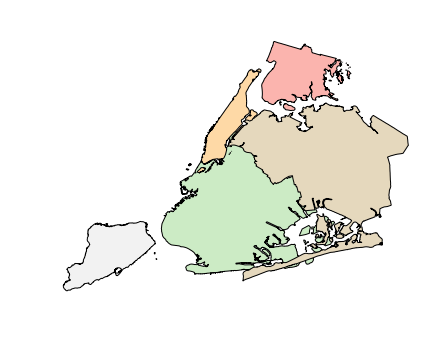

In [93]:
carto_p = gplt.cartogram(nyc_boroughs,scale='productions',limits=(.7,1.3),hue='BoroName',cmap='Pastel1')

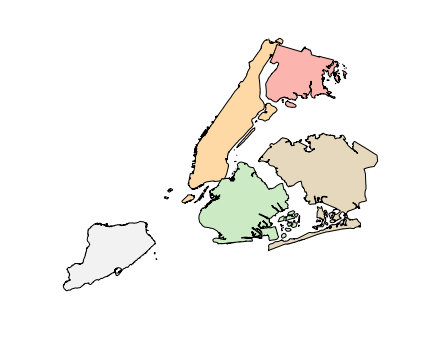

In [54]:
carto_a = gplt.cartogram(nyc_boroughs,scale='attractions',limits=(.7,1.3),hue='BoroName',cmap='Pastel1')

In [85]:
def init():
    return (nyc,)

In [86]:
def animate(i):
    ub = 1 + 0.01*i*0.3
    lb = 1 - 0.01*i*0.3
    nyc = gplt.cartogram(nyc_boroughs,scale='productions',limits=(lb,ub),hue='BoroName',cmap='Pastel1');
    return (nyc,)

In [87]:
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=200, 
                               blit=True)

/Users/jonathanleape/opt/anaconda3/lib/python3.7/site-packages/geoplot/geoplot.py:645: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=self.figsize)


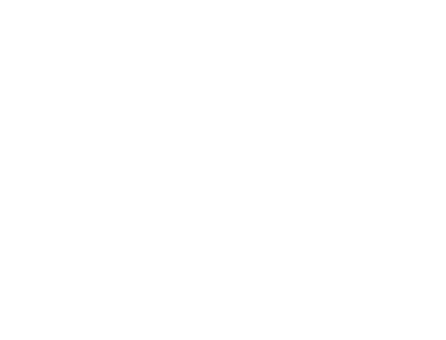

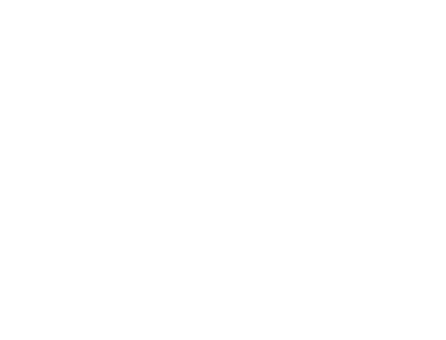

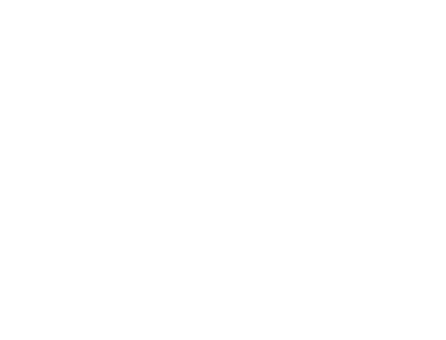

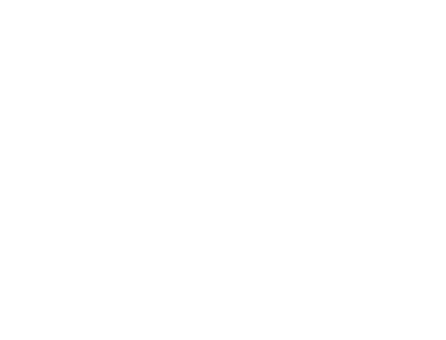

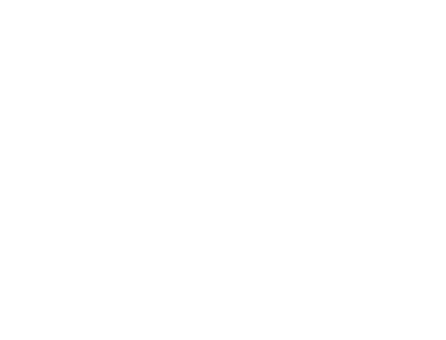

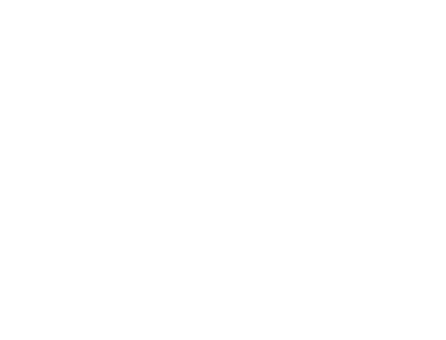

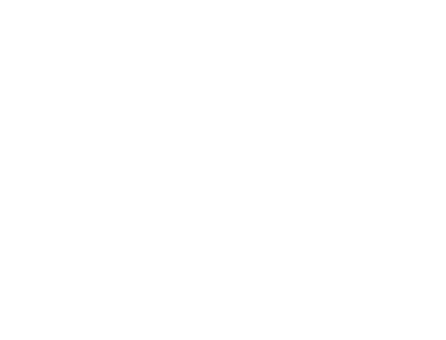

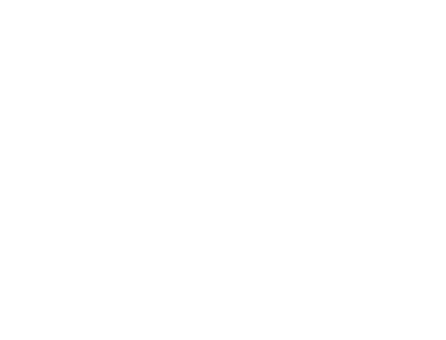

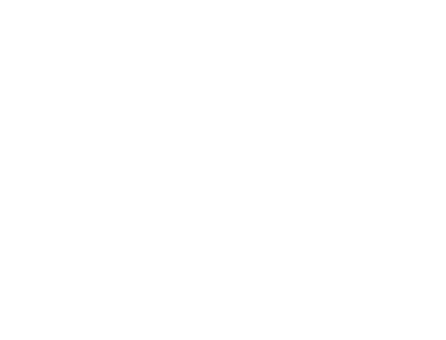

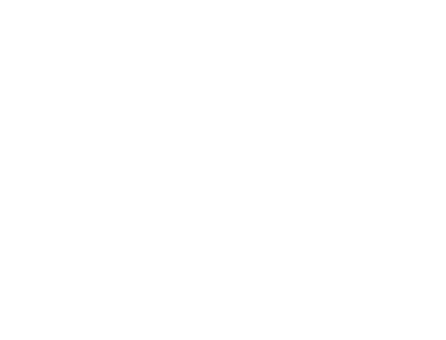

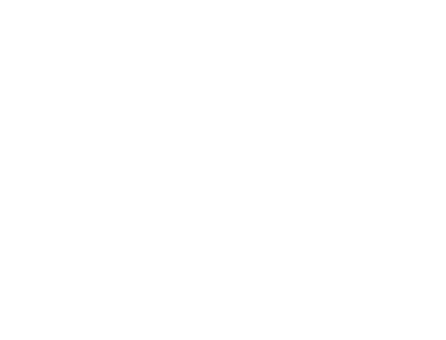

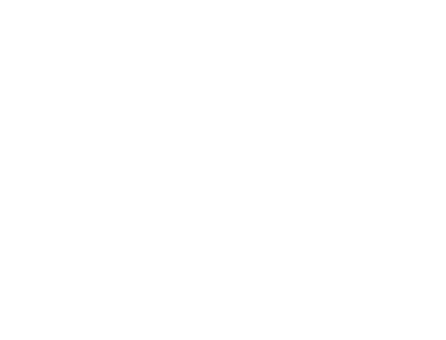

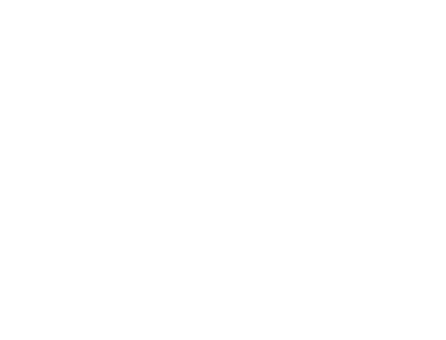

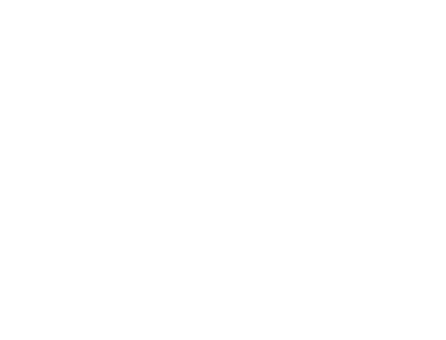

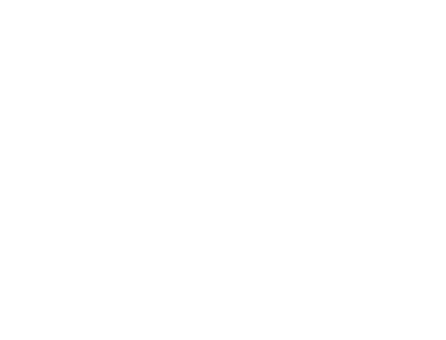

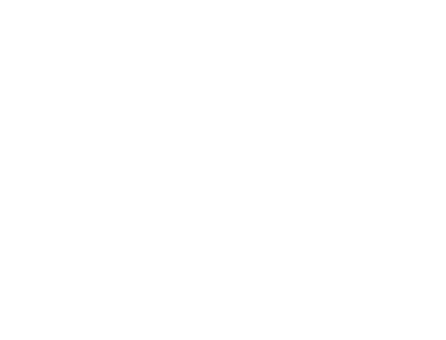

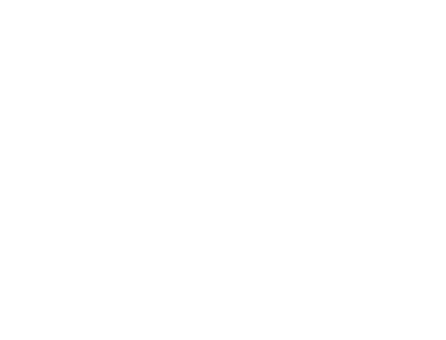

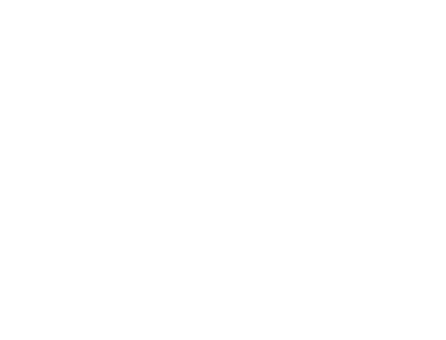

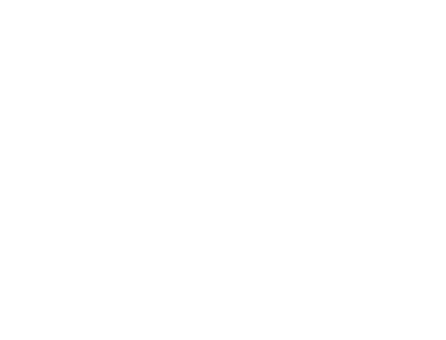

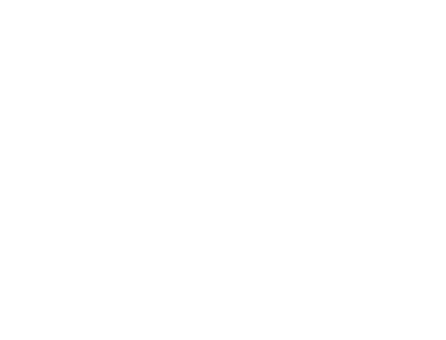

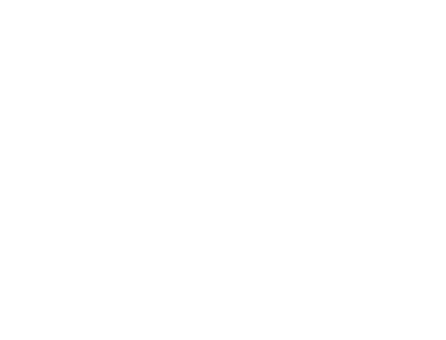

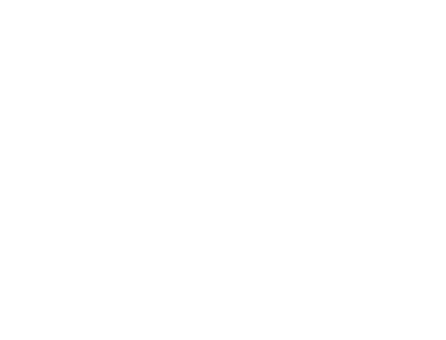

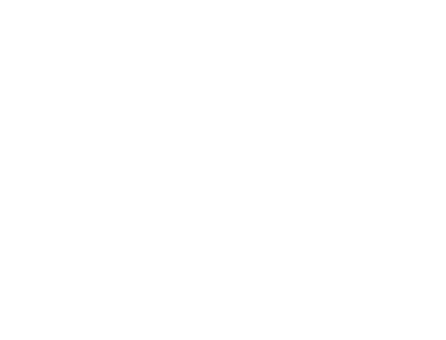

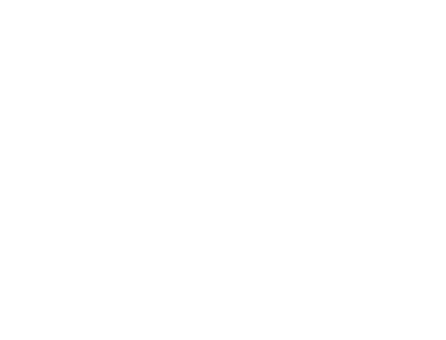

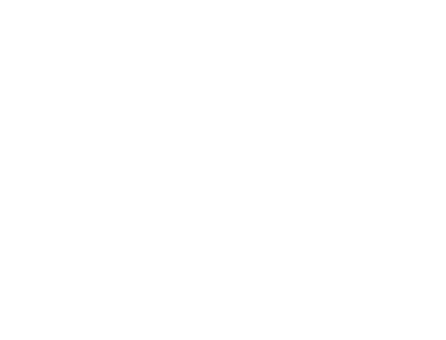

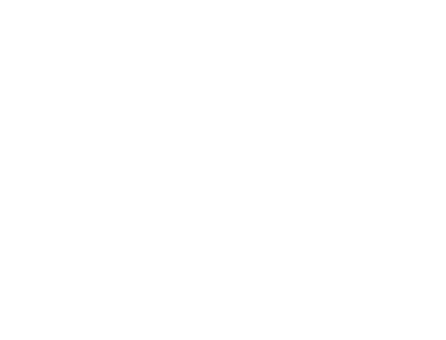

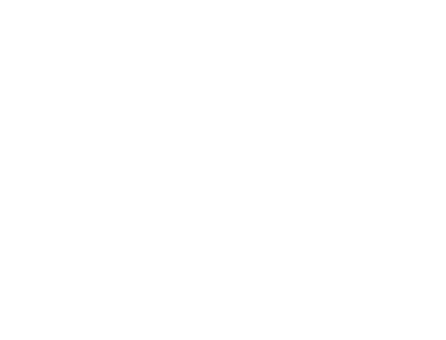

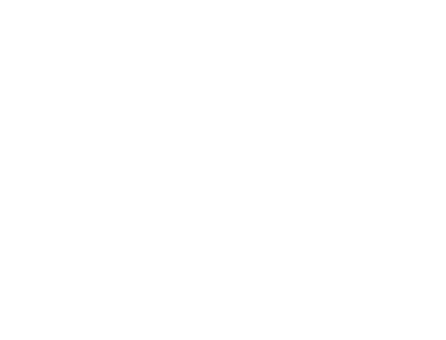

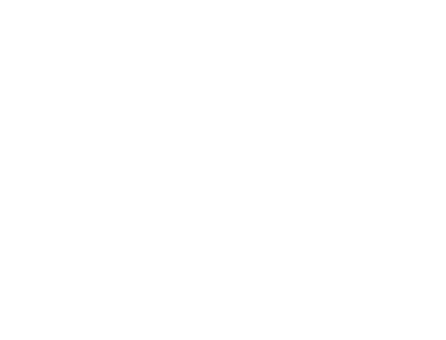

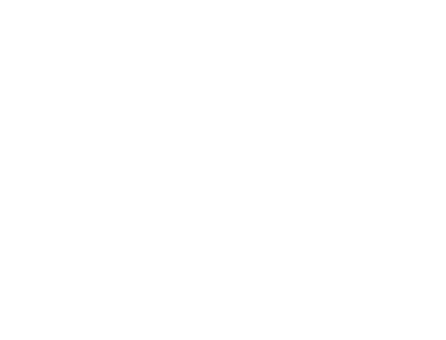

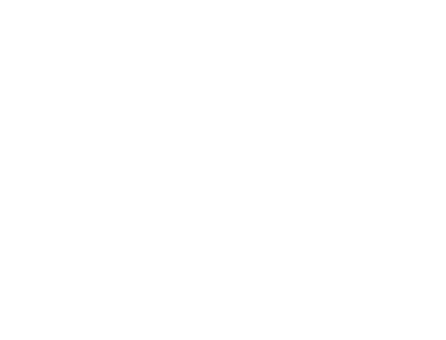

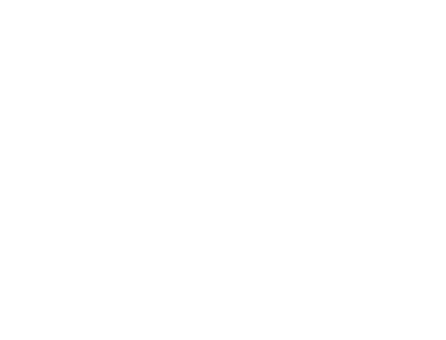

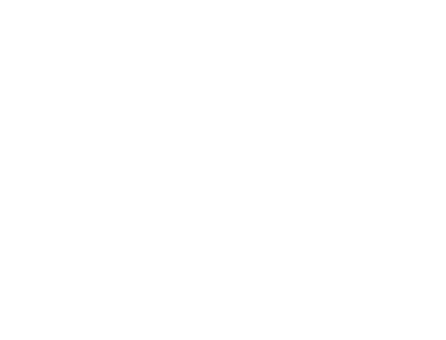

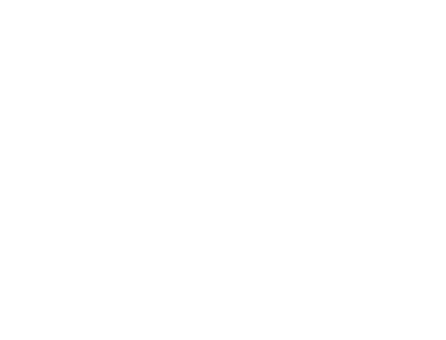

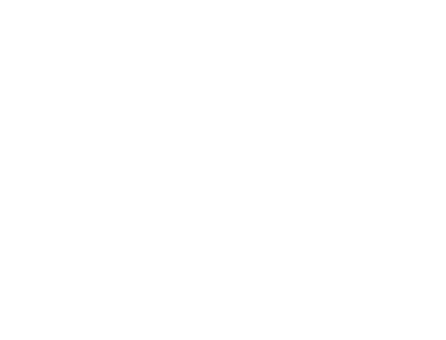

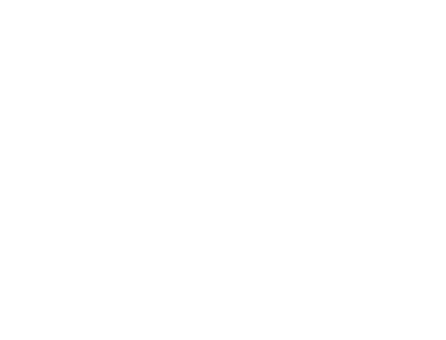

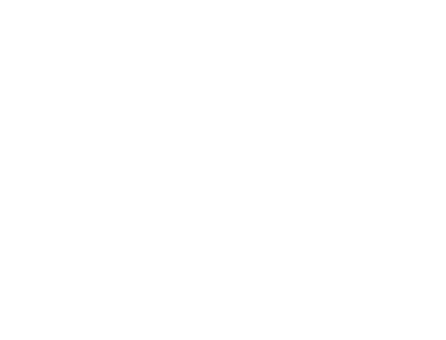

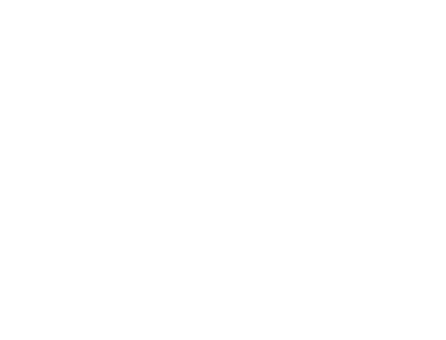

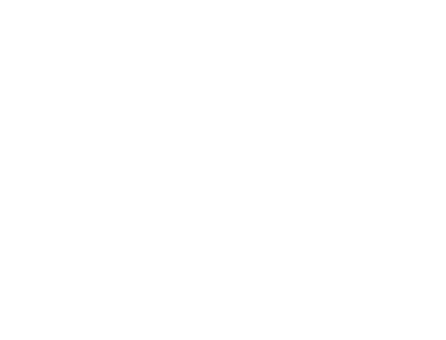

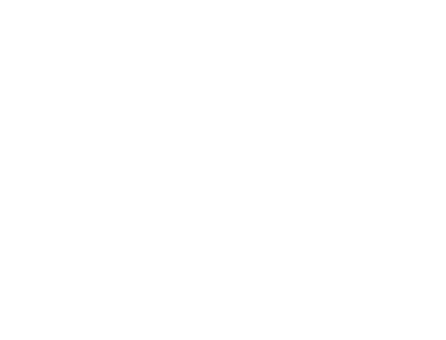

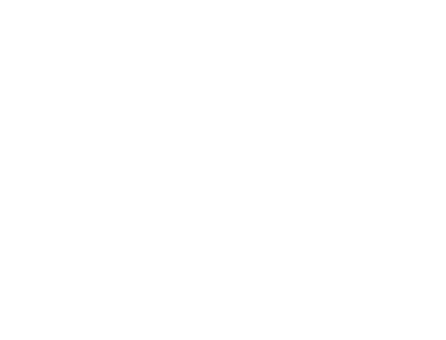

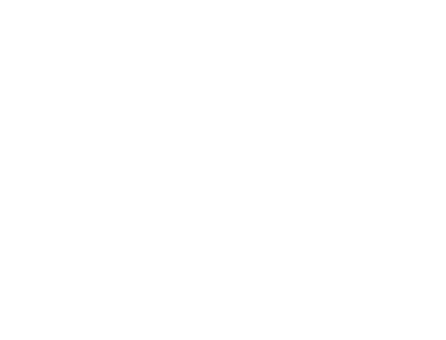

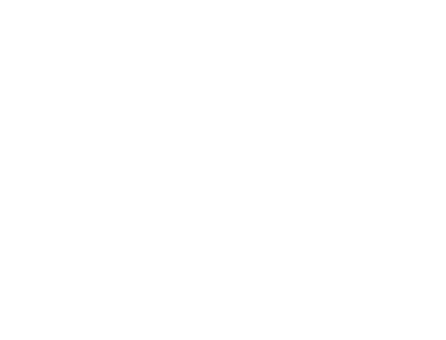

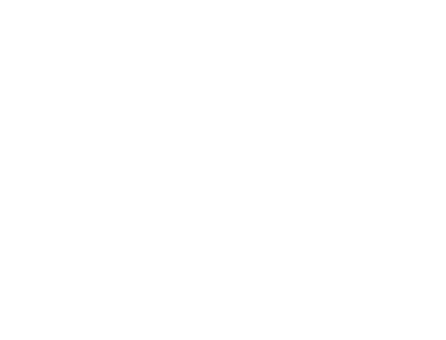

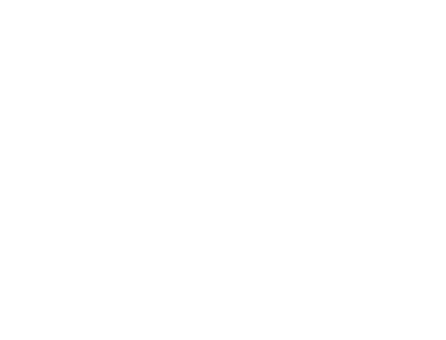

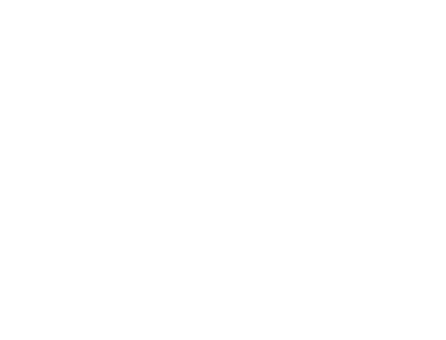

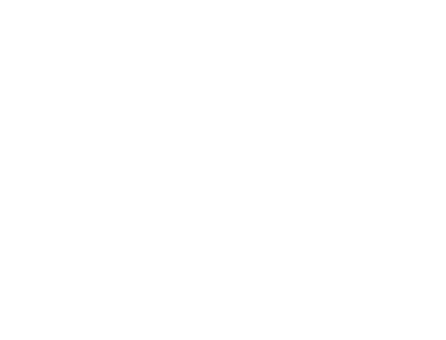

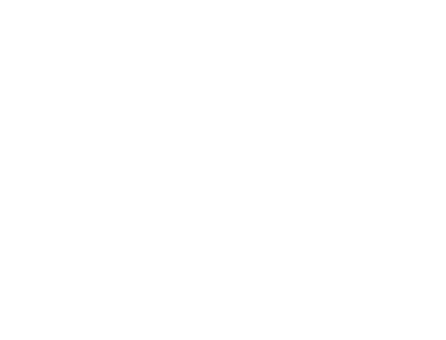

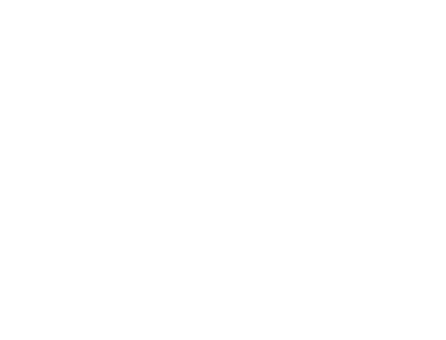

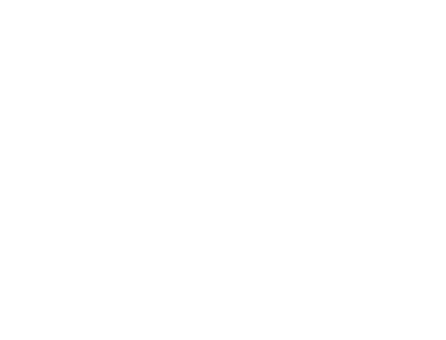

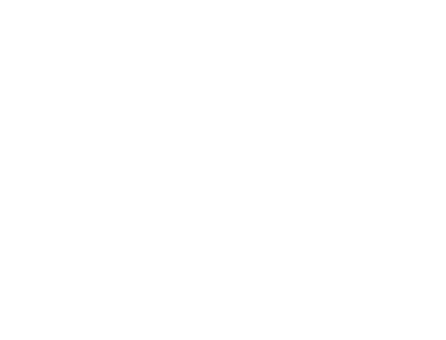

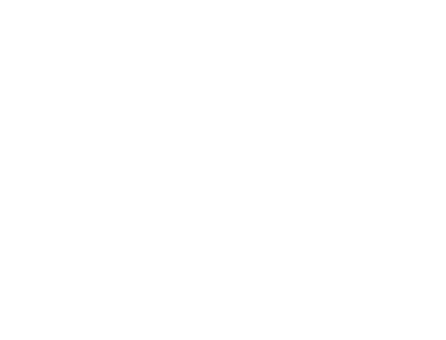

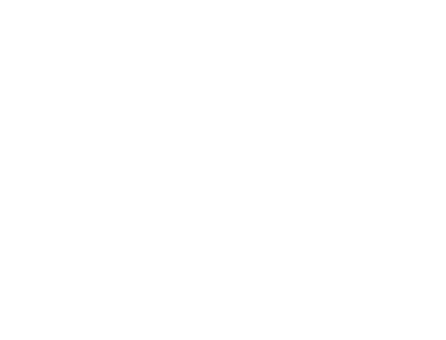

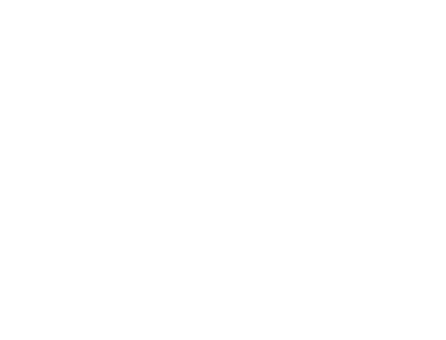

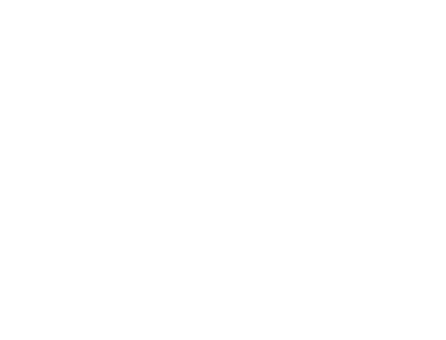

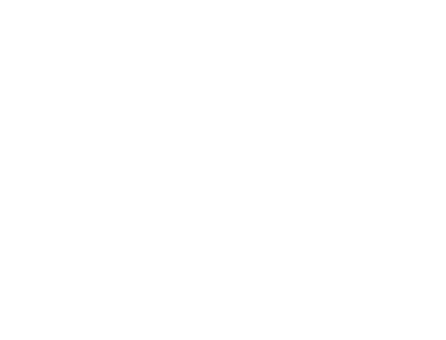

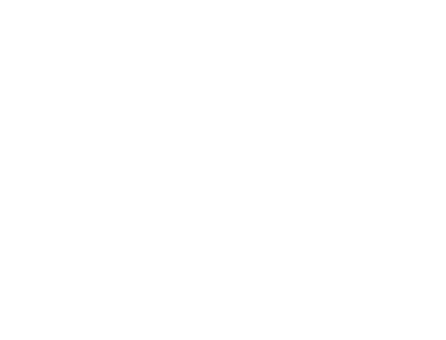

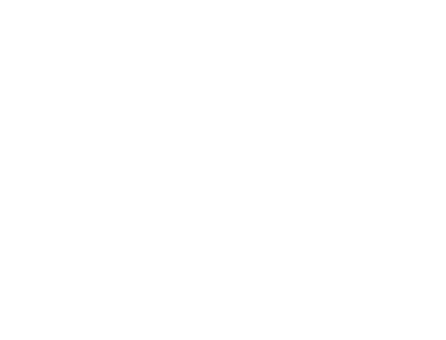

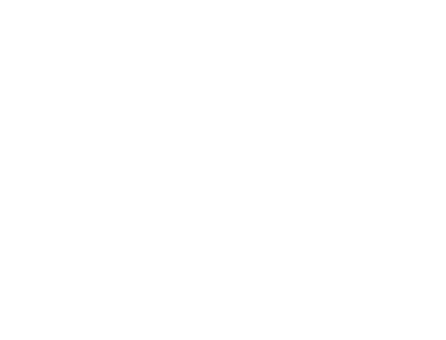

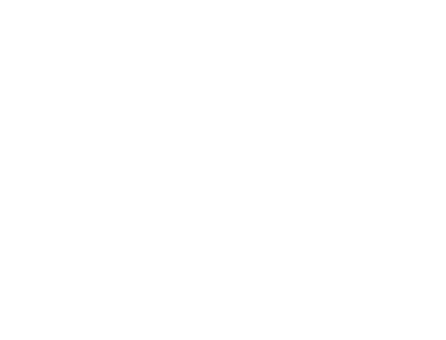

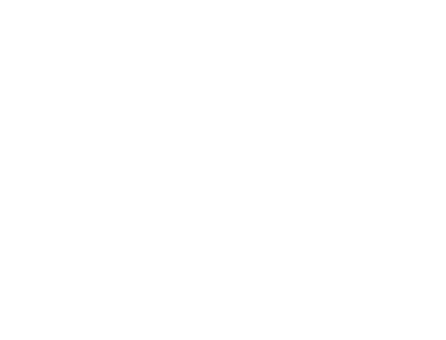

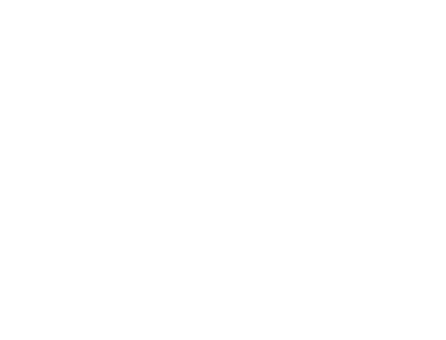

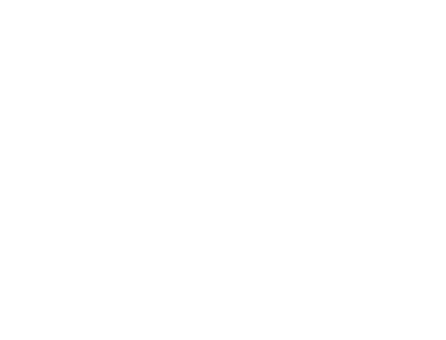

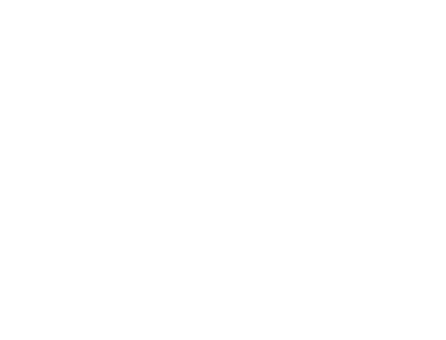

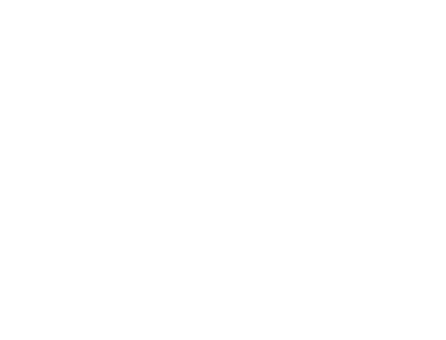

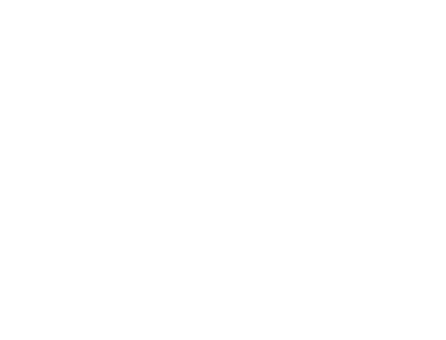

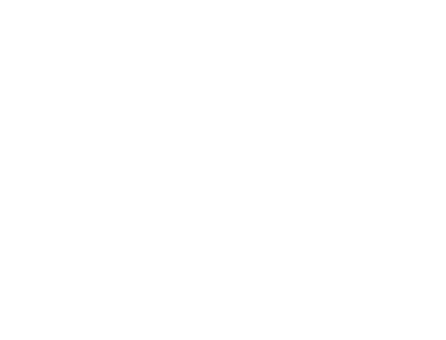

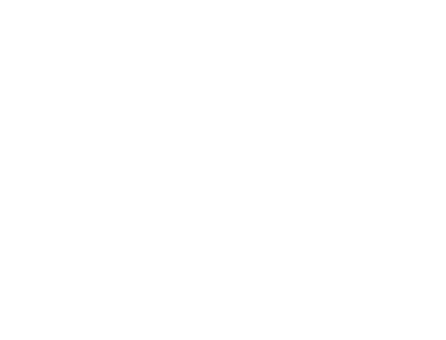

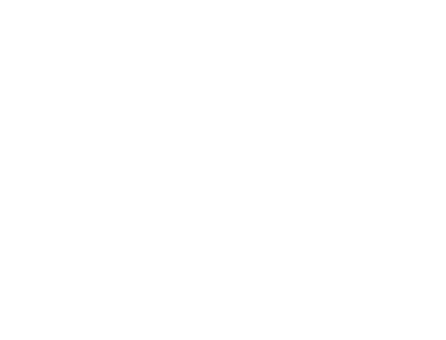

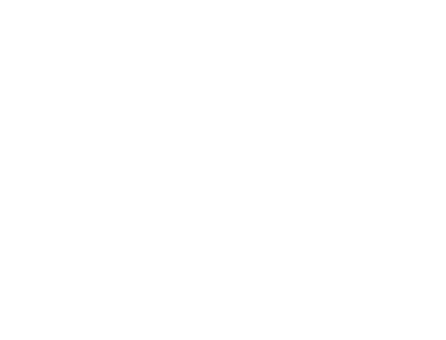

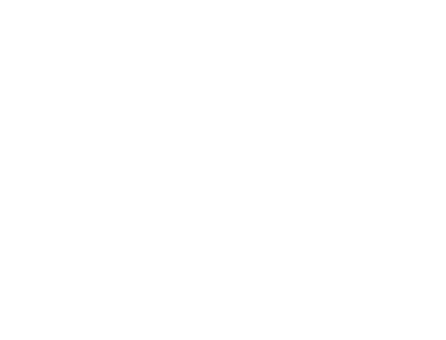

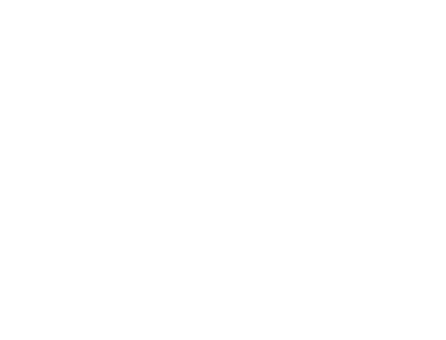

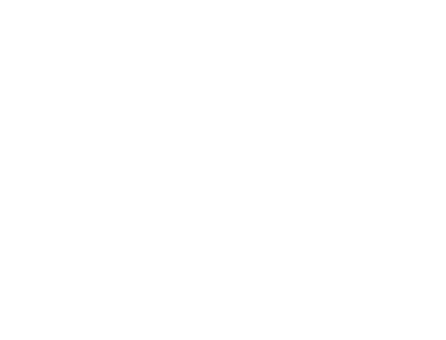

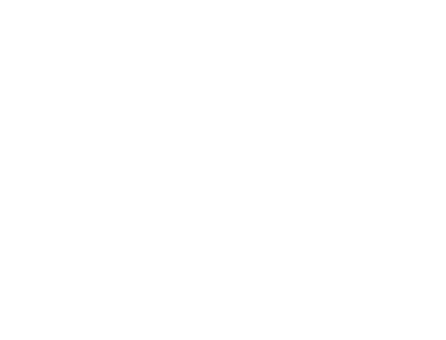

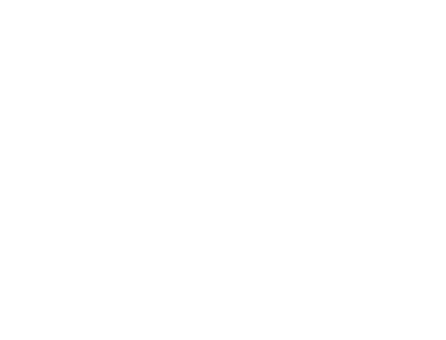

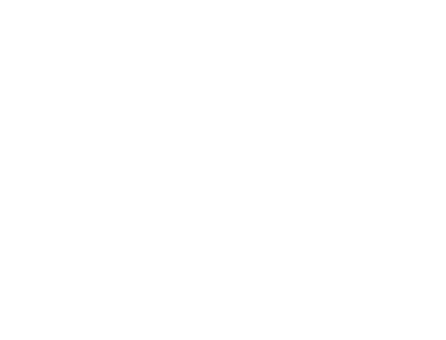

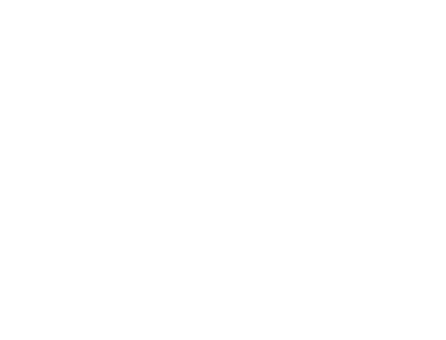

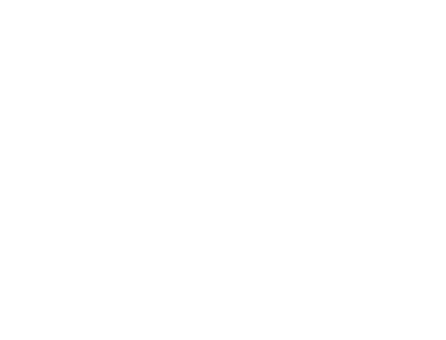

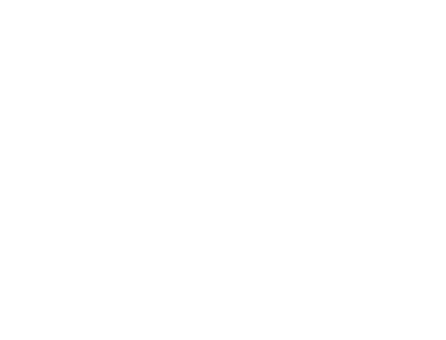

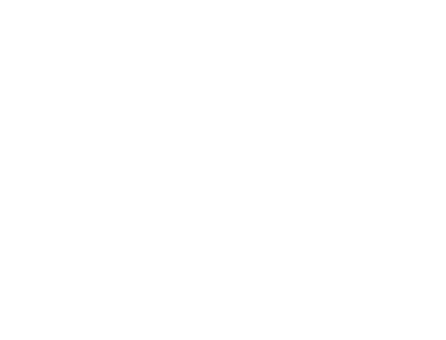

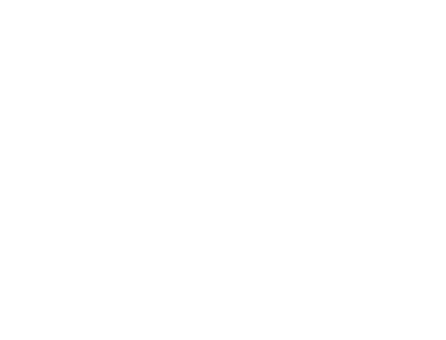

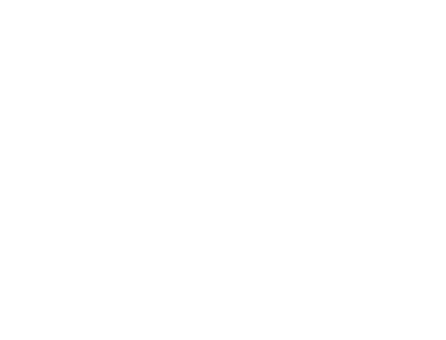

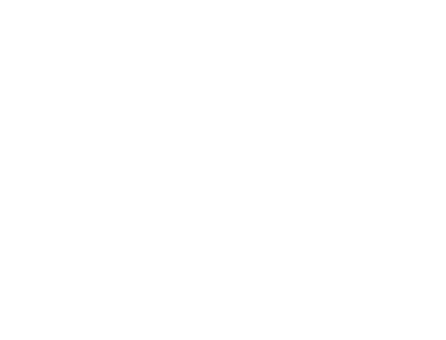

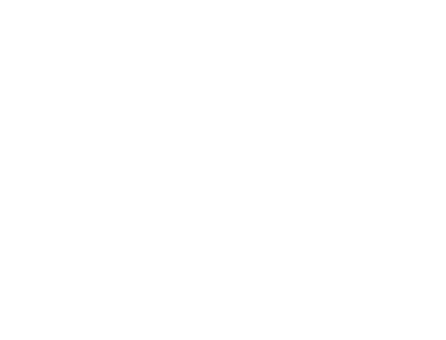

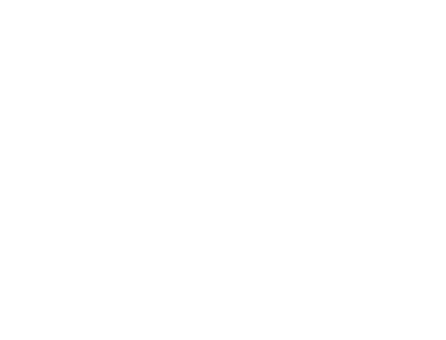

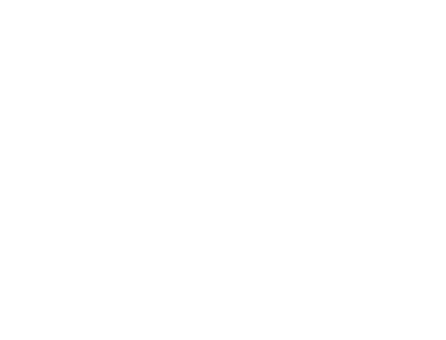

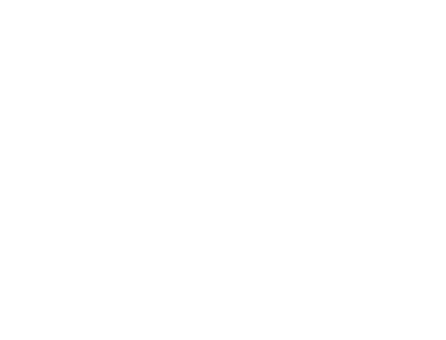

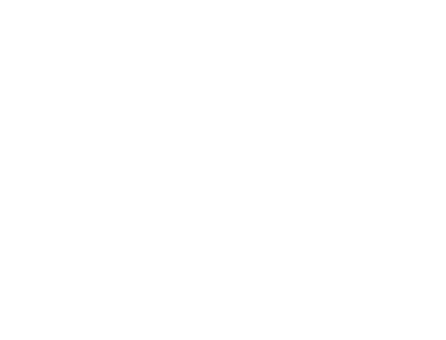

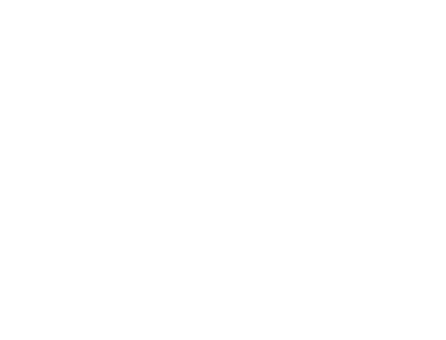

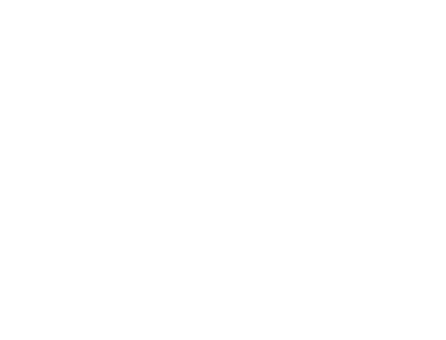

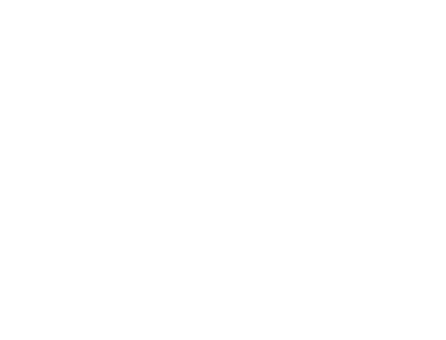

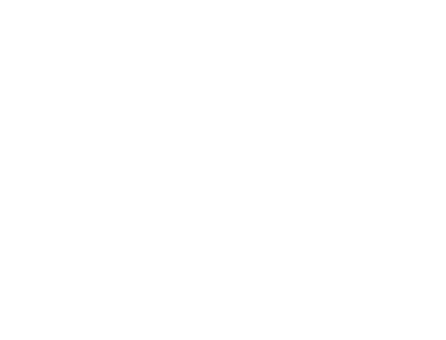

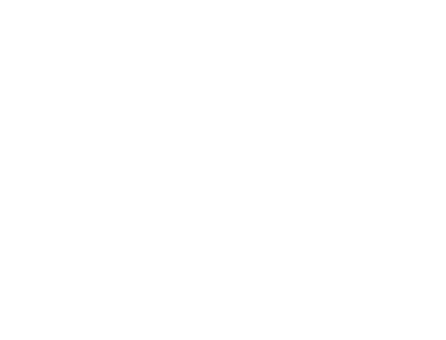

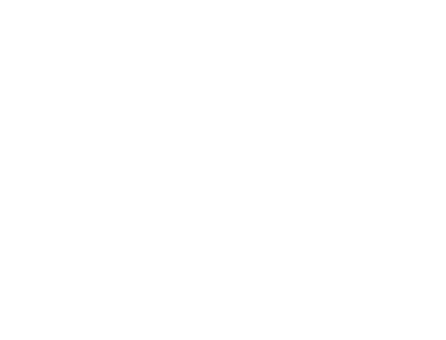

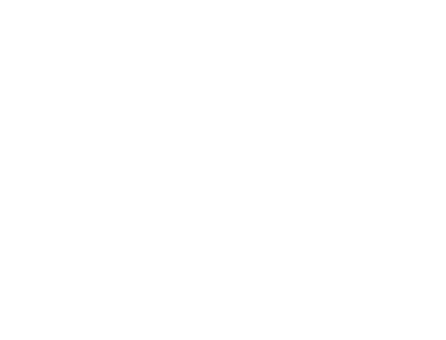

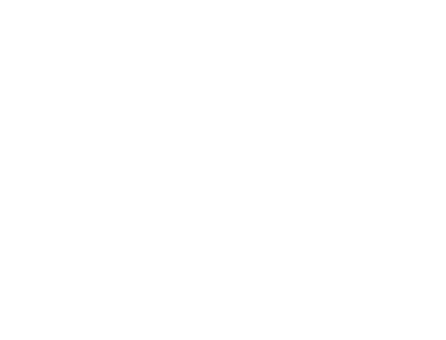

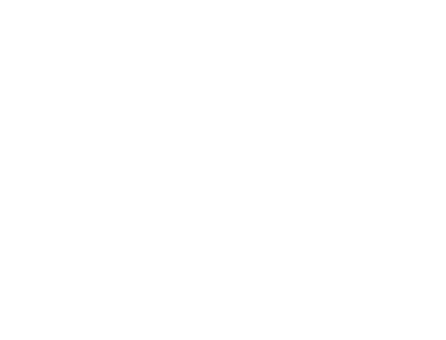

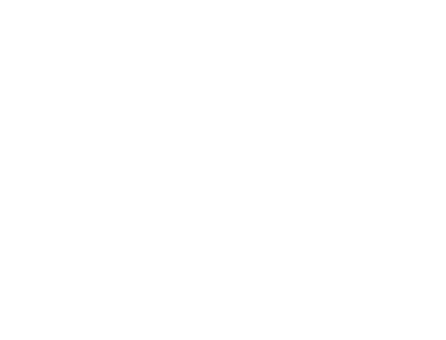

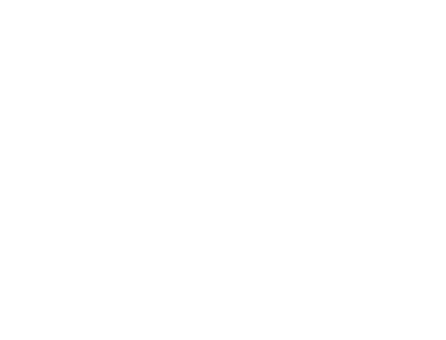

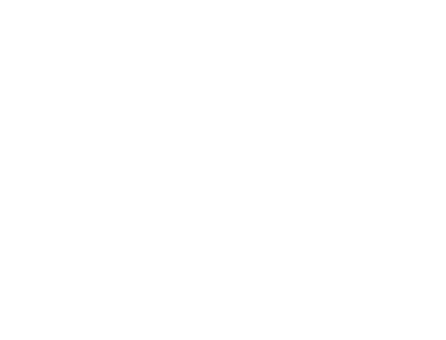

In [88]:
HTML(anim.to_jshtml())